# Estimated sequence diversity

In this notebook, we're going to make the following figure panels:

  * Single-subject sequence diversity lineplot (**Figure 2d**)
  * Cross-subject sequence diversity lineplot (**Figure 2e**)
  
The code to produce the processed data used to make these plots can be found [**here**](LINK). The processed data is also included in this repository. Running the code in this notebook will use the included data by default.

The following Python packages are required to run the code in this notebook:
  * numpy
  * pandas
  * matplotlib
  * seaborn

They can be install by running `pip install numpy pandas matplotlib seaborn`

In [1]:
import json
import os
import sys

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## Subjects and colors

In [2]:
# subjects
with open('../data_processing/data/subjects.txt') as f:
    subjects = sorted(f.read().split())

# colors
colors = sns.hls_palette(10, s=0.9)
colors[3] = sns.hls_palette(11, s=0.9)[3]
colors[4] = sns.hls_palette(12, s=0.9)[5]

## Sequence diversity (by subject)

### Load data

The default `data_path` variable points to the sequence diversity estimation data included in this repository. If you've generated diversity estimates yourself (either by running the [**code**](LINK) used to generate the diversity estimates in our manuscript or by running your own code), modify the `data_path` variable as needed.

*Note: running the Recon estimation code takes a subtantial amount of time (a few hours on a modern MacBook Pro), so we recommend using the included diversity data if your primary interest is in recreating the manuscript figures.*

In [11]:
# input data location
data_path = '../data_processing/data/diversity_estimation/'

# read Chao2 data
chao_file = os.path.join(data_path, 'single-subject_sequences_chao2.json')
with open(chao_file) as f:
    chao_diversity = json.load(f)
    
# read Recon data
recon_file = os.path.join(data_path, 'single-subject_sequences_recon.json')
with open(recon_file) as f:
    recon_diversity = json.load(f)

### Lineplot of diversity estimates

If you'd like to save the figure file (rather than just showing inline without saving), comment out the `plt.show()` line and uncomment the final two lines of the below code block.

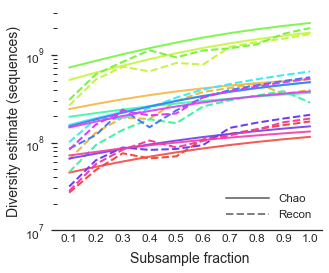

In [13]:
# initialize the plot
sns.set_style('white')
plt.figure(figsize=(4.75, 4))
plots = []

# plot the diversity data
for color, subject in zip(colors, subjects):
    x = sorted(chao_diversity[subject].keys())
    chao_ys = [np.mean(chao_diversity[subject][k]) for k in x]
    recon_ys = [np.mean(recon_diversity[subject][k]) for k in x]

    plot = plt.plot(x, chao_ys, c=color, alpha=0.9, linewidth=2, label=subject)
    plt.plot(x, recon_ys, c=color, linestyle='dashed', linewidth=2)
    plots.append(plot)

# style the plot
ax = plt.gca()
# axis limits and scale
ax.set_yscale("log")
ax.set_ylim([10**7, 3 * 10**9])
# style ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12, length=6, width=1.25, pad=6, right=False)
ax.tick_params(axis='y', which='minor', left=True, right=False, length=4, width=1, pad=8)
# hide top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# axis lables
ax.set_ylabel('Diversity estimate (sequences)', size=14)
ax.set_xlabel('Subsample fraction', size=14, labelpad=8)
# plot the legend
chao_proxy = mpl.lines.Line2D([0], [0], color='grey', linewidth=2)
recon_proxy = mpl.lines.Line2D([0], [0], linestyle='dashed', color='grey', linewidth=2)
ax.legend([chao_proxy, recon_proxy], ['Chao', 'Recon'],
          loc='lower right', fontsize=11.5, handlelength=3.75)

# save or show
plt.show()
# plt.tight_layout()
# plt.savefig('./sequence-diversity-estimation_lineplot_chao2-vs-recon.pdf')

### Stripplot of max diversity estimates

If you'd like to save the figure file (rather than just showing inline without saving), comment out the `plt.show()` line and uncomment the final two lines of the below code block.

In [14]:
recon_maxes = [{'subject': subject,
                'Diversity estimate (sequences)': np.mean(recon_diversity[subject]['1.0']),
                'estimator': 'R'} for subject in subjects]

chao_maxes = [{'subject': subject,
               'Diversity estimate (sequences)': np.mean(chao_diversity[subject]['1.0']),
               'estimator': 'C'} for subject in subjects]

max_df = pd.DataFrame(recon_maxes + chao_maxes)

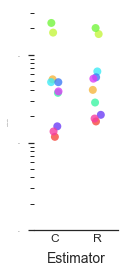

In [16]:
# initialize the plot
sns.set_style('white')
plt.figure(figsize=(1.5, 4))

# plot the data
sns.stripplot(data=max_df,
              x='estimator',
              y='Diversity estimate (sequences)',
              hue='subject',
              order=['C', 'R'],
              size=8,
              palette={s: c for s, c in zip(subjects, colors)},
              jitter=True,
              alpha=0.8)

# style the plot
ax = plt.gca()
# remove legend
ax.legend_.remove()
# set axis scales, limits and labels
ax.set_yscale("log")
ax.set_ylim([10**7, 3.0 * 10**9])
ax.set_xlabel('Estimator', size=14, labelpad=8)
ax.set_ylabel('Clonotype fraction', size=0, labelpad=8)
# style ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=0, length=6, width=1.25, pad=8, right=False)
ax.tick_params(axis='y', which='minor', left=True, right=False, length=4, width=1, pad=8)
# remove top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# save or show
plt.show()
# plt.tight_layout()
# plt.savefig('./figures/clonotype-diversity-estimation_max-scatter_chao2-vs-recon.pdf')

## Sequence diversity (multi-subject pools)

### Load data

In [18]:
# read Chao2 data
chao_cross_subject_file = os.path.join(data_path, 'cross-subject_sequences_chao2.json')
with open(chao_cross_subject_file) as f:
    chao_cross_subject_diversity = json.load(f)
    
# read Recon data
recon_cross_subject_file = os.path.join(data_path, 'cross-subject_sequences_recon.json')
with open(recon_cross_subject_file) as f:
    recon_cross_subject_diversity = json.load(f)

### Lineplot of cross-subject diversity estimates

If you'd like to save the figure file (rather than just showing inline without saving), comment out the `plt.show()` line and uncomment the final two lines of the below code block.

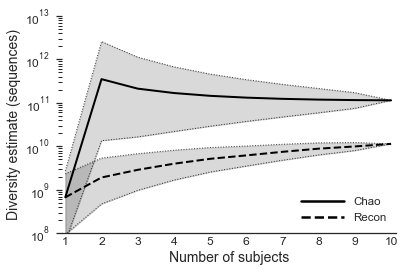

In [20]:
# initialize the plot
sns.set_style('white')
plt.figure(figsize=[6, 4])

# plot Chao2 data
xs = list(range(1, 11))
plt.semilogy(xs, [10**m for m in chao_cross_subject_diversity['lognorm_means']],
             'k', linewidth=2, label='Chao')
plt.plot(xs, [10**l for l in chao_cross_subject_diversity['lognorm_lowers']],
         'k:', linewidth=1, alpha=0.75)
plt.plot(xs, [10**l for l in chao_cross_subject_diversity['lognorm_uppers']],
         'k:', linewidth=1, alpha=0.75)
plt.fill_between(x=xs,
                 y1=[10**l for l in chao_cross_subject_diversity['lognorm_lowers']],
                 y2=[10**u for u in chao_cross_subject_diversity['lognorm_uppers']],
                 alpha=0.15, color='k')

# plot Recon data
plt.semilogy(xs, [10**m for m in recon_cross_subject_diversity['lognorm_means']],
             'k--', linewidth=2, label='Recon')
plt.plot(xs, [10**l for l in recon_cross_subject_diversity['lognorm_lowers']],
         'k:', linewidth=1, alpha=0.75)
plt.plot(xs, [10**l for l in recon_cross_subject_diversity['lognorm_uppers']],
         'k:', linewidth=1, alpha=0.75)
plt.fill_between(x=xs, y1=[10**l for l in recon_cross_subject_diversity['lognorm_lowers']],
                 y2=[10**u for u in recon_cross_subject_diversity['lognorm_uppers']],
                 alpha=0.15, color='k')

# style the plot
ax = plt.gca()
# set axis limits and labels
ax.set_xlim([0.9, 10.15])
ax.set_ylim([1 * 10**8, 10**13])
ax.set_xlabel('Number of subjects', fontsize=14)
ax.set_ylabel('Diversity estimate (sequences)', fontsize=14)
# style ticks
ax.set_xticks(np.arange(1, 11, 1))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12, length=6, width=1.25, pad=6, right=False)
ax.tick_params(axis='y', which='minor', left=True, right=False, length=4, width=1, pad=8)
# remove top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# style the legend
chao_line_proxy = mpl.lines.Line2D([0], [0], color='k', linewidth=2.5)
recon_line_proxy = mpl.lines.Line2D([0], [0], linestyle='dashed', color='k', linewidth=2.5)
ax.legend([(chao_line_proxy), (recon_line_proxy)], ['Chao', 'Recon'],
          loc='lower right', fontsize=11.5, handlelength=3.75)

# save or show
plt.show()
# plt.tight_layout()
# plt.savefig('./figures/sequence-diversity-estimation_cross-subject_chao2-vs-recon.pdf')